Контрольные вопросы:
1) **Перечислите этапы выполнения задачи обработки текстовых данных?**
   1) сбор данных
   2) очистка данных:
      1) удаление шумов 
      2) приведение слов к начальной форме
      3) удаление дубликатов
      4) удаление стоп-слов
    3) токеизация
    4) представление текста, преобразование токенов в числовые последовательности
    5) обработка признаков (нормализация и т.д.)
    6) разделение данных (train, val(опционально), test)
    7) обучение модели 
    8) оценка модели 
    9) тонкая настройка гиперпараметров
    10) внедрение
   
2) **Какие задачи NLP вам известны?**
   1) классификация данных 
   2) NEB - извлечение именованных сущностей (имена людей...)
   3) анализ тональности 
   4) машинный перевод 
   5) коррекция текста 
   6) диалоговые системы 
   7) суммаризация текста 
   8) поиск информации 
   9) распознавание речи 
   
3) **В чем суть операций стандартизации, токенизации, исключения стоп-слов? Как можно реализовать эти операции в Keras?**
   1) Стандартизация — это процесс преобразования данных так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это особенно важно, поскольку помогает достичь лучшей сходимости при обучении.
   2) Токенизация — это процесс разделения текста на отдельные "токены" (например, слова или фразы), чтобы их можно было проанализировать. Это помогает подготовить текст для моделирования, преобразуя его в более структурированный формат.
   3) Стоп-слова — это распространенные слова (например, "и", "в", "на"), которые часто не несут значимой информации для анализа текста. Исключение этих слов может помочь модели лучше сосредоточиться на более важном содержании текста.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def standardize_text(text):
    # Приведение к нижнему регистру и удаление пунктуации
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

texts = ["Это первый текст", "Второй текст в и с содержит некоторые стоп-слова"]
print("Первоначальный текст", texts)

# Стандартизация текстов
standardized_texts = [standardize_text(text) for text in texts]


# Исключение стоп-слов
filtered_texts = [remove_stop_words(text) for text in standardized_texts]

# Токенизация
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_texts)
sequences = tokenizer.texts_to_sequences(filtered_texts)

print("Стандартизация ", standardized_texts)
print("Тексты без стоп-слов:", filtered_texts)
print("Последовательности:", sequences)


4) **Как представляются исходные данные в задачах обработки текста?**
В задачах обработки текста исходные данные представляются различными способами, в зависимости от конкретной задачи и метода обработки.
   1) в сыром виде (просто текст)
   2) токены
   3) токены с индексацией
   4) частотные представления
   5) векторные представления
   6) числовые (Bag of Words, TF-IDF)

5) **Как формируются векторные представления слов в естественных языках?**
Векторные представления слов, или эмбеддинги слов, — это способ преобразования слов в числовые векторы. 
   1) Сбор данных 
   2) Предобработка данных 
      1) удаление стоп-слов
      2) приведение к стандартной форме
      3) построение контекстной матрицы
      4) векторизация


Практические задания:
1) Определите задачу для обработки текстовых данных, например:
   - Классификация постов Twitter.
   - Классификация отзывов на фильмы или книги на русском языке (Кинопоиск, Читай-город).
   - Классификация жанров музыки (как 1-top, так и 5-top).
   - Классификация эмоций (любой датасет, может быть как бинарная, так и многоклассовая классификация).
2) Найдите исходный датасет. Опишите его параметры и дайте ссылку.
3) Выполните предобработку набора данных для подачи на вход нейронной сети.
4) Используйте один из подходов машинного обучения для классификации: формирование векторных данных, формирование последовательностей.
5) Примените предобученное векторное представление для текстовых данных, например GloVe (в случае, если вы обрабатываете данные на английском языке).
6) Сравните точность и ошибку обучения, постройте графики обучения.

В качеств задачи для обработки тестовых данных был выбран классификатор отызвов на русском языке.

Ссылка: https://www.kaggle.com/datasets/theodaimones888/russian-anime-reviews-dataset


In [ ]:
# Структура датасета
import pandas as pd

data_path = 'data.csv'
pd.read_csv(data_path)




**Предобработка данных **

In [ ]:
# Оставляем стобцы rate и text 
data = pd.read_csv(data_path)
data = data[['Rate', 'Text']]
data.to_csv('dataset.csv')

print(data.head())


In [ ]:
import re

def clear_text(text):
    # Проверяем, является ли текст строкой
    if isinstance(text, str):
        # Удаление специальных символов и лишние пробелы
        text = re.sub(r'[^а-яА-ЯёЁ0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return text  # Возвращаем значение без изменений, если это не строка

# Применение функции к столбцу 'Text'
data['Text'] = data['Text'].apply(clear_text)
data.to_csv('dataset.csv')

print(data.head())


In [ ]:
# Удаление дубликатов 
data = data.drop_duplicates(subset='Text', keep='first').reset_index(drop=True)

In [ ]:
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def remove_stopwords(text):
    # Проверяем, является ли текст строкой
    if isinstance(text, str):
        # Удаляем стоп-слова и возвращаем очищенный текст
        return ' '.join([word for word in text.split() if word not in stop_words])
    else:
        # Если это не строка, возвращаем значение без изменений
        return text

# Применяем функцию к столбцу 'Text'
data['Text'] = data['Text'].apply(remove_stopwords)

# Сохраняем DataFrame в CSV файл
data.to_csv('dataset.csv', index=False)

# Выводим первые 5 строк DataFrame
print(data.head())


In [ ]:
import pandas as pd
import spacy
import re
from tqdm import tqdm

# Загружаем языковую модель
nlp = spacy.load('ru_core_news_sm')

def preprocess_text(text):
    # Проверяем, является ли значение строкой
    if not isinstance(text, str):  # Если текст не строка
        return ""  # Возвращаем пустую строку или используем какое-то значение по умолчанию

    # Удаление специальных символов
    text = re.sub(r'[^а-яА-ЯёЁ0-9\s]', '', text)  # Убираем всё, кроме русских букв и цифр
    
    # Лемматизация с использованием spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if not token.is_punct]  # Убираем знаки препинания
    return ' '.join(lemmatized_words)

# Загрузка датасета
data = pd.read_csv('dataset.csv')

# Используем tqdm для отслеживания процесса применения функции к столбце 'Text'
tqdm.pandas(desc="Обработка текста")

# Применение предобработки к столбце 'Text' с отслеживанием прогресса
data['Text'] = data['Text'].progress_apply(preprocess_text)

print(data['Text'].head())


In [73]:
# Переобразование столбца Rate в формат (0 1 2)
import pandas as pd 

df = pd.read_csv('dataset_.csv')

label_mapping = {
    'Отрицательный' : 0,
    'Нейтральный' : 1,
    'Положительный' : 2
}

df['Rate'] = df['Rate'].map(label_mapping)
df.to_csv('dataset.csv')
print(df.head())

   Rate                                               Text
0     1  первой арки несколько разочаровался ожидал бол...
1     2  Концовка какаято мутная понял Надеюсь второй с...
2     2  Что сказать Никакого сравнени пытается подража...
3     2  Только досмотрел переполняют эмоцииШедевр Затя...
4     2  И правда оторваться Но помоему Медузе 11 серий...


In [ ]:
import pandas as pd

# Загрузка CSV файла
df = pd.read_csv(r'C:\Projects\Учёба\2 семестр магистратура\(Э) Методы обработки не структурированных данных\lab2\lab2\dataset.csv')

# Удаление строк, где Rate равно 1
df = df[df['Rate'] != 1]
# Замена всех значений 2 на 1 в столбце 'Rate'
df['Rate'] = df['Rate'].replace(2, 1)
# Приведение столбца 'Text' к нижнему регистру
df['Text'] = df['Text'].str.lower()

# Сохранение отфильтрованного DataFrame обратно в CSV файл
df.to_csv(r'C:\Projects\Учёба\2 семестр магистратура\(Э) Методы обработки не структурированных данных\lab2\lab2\dataset.csv', index=False)


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1138s 4s/step - accuracy: 0.6803 - loss: 0.5946 - val_accuracy: 0.7614 - val_loss: 0.5080
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1166s 4s/step - accuracy: 0.7611 - loss: 0.4982 - val_accuracy: 0.7799 - val_loss: 0.4796
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1203s 4s/step - accuracy: 0.7845 - loss: 0.4645 - val_accuracy: 0.7970 - val_loss: 0.4421
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1219s 4s/step - accuracy: 0.8043 - loss: 0.4309 - val_accuracy: 0.7997 - val_loss: 0.4335
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1223s 4s/step - accuracy: 0.8140 - loss: 0.4147 - val_accuracy: 0.8022 - val_loss: 0.4236
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1251s 4s/step - accuracy: 0.8271 - loss: 0.3886 - val_accuracy: 0.8094 - val_loss: 0.4239
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1255s 4s/step - accuracy: 0.8403 - loss: 0.3651 - val_accuracy: 0.8103 - val_loss: 0.4258
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1255s 4s/step - accuracy: 0.8446 - loss: 0.3514 - 

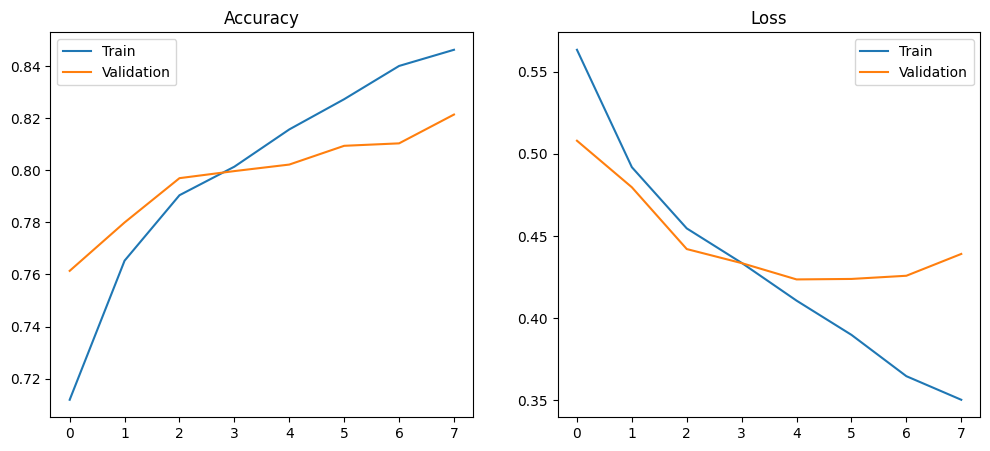

In [75]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import matplotlib.pyplot as plt

# 1. Загрузка данных
data = pd.read_csv(r'C:\Projects\Учёба\2 семестр магистратура\(Э) Методы обработки не структурированных данных\lab2\lab2\dataset.csv', sep=',', encoding='utf-8') 

# 2. Подготовка текстов и меток
texts = data['Text'].values.astype(str)
labels = data['Rate'].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    texts, 
    labels, 
    test_size=0.2, 
    random_state=42
)

# 3. Настройка токенизатора
max_words = 10000  # Увеличиваем размер словаря
tokenizer = Tokenizer(num_words=max_words, filters='', lower=False)
tokenizer.fit_on_texts(X_train)

# Преобразование текстов в последовательности
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг
max_len = 300  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# 4. Загрузка русских эмбеддингов
embedding_dim = 300  # Размерность векторов wiki.ru.vec
embedding_index = {}

with open(r'C:\Projects\wiki.ru.vec', 'r', encoding='utf-8') as f:
    next(f)  # Пропускаем первую строку с параметрами
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Создание матрицы эмбеддингов
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 5. Создание модели
model = Sequential()
model.add(Embedding(
																				input_dim=max_words,
																				output_dim=embedding_dim,
																				weights=[embedding_matrix],
																				trainable=False  # дообучения
))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 6. Обучение модели с колбэками
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
																				X_train_pad, 
																				y_train,
																				epochs=15,
																				batch_size=128,
																				validation_data=(X_test_pad, y_test),
																				callbacks=[early_stop]
)

# 7. Оценка и визуализация
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Графики обучения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


In [82]:
# Сохранение модели в формате Keras
model.save(r'C:\Projects\Учёба\2 семестр магистратура\(Э) Методы обработки не структурированных данных\lab2\lab2\my_model.keras')


In [86]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Ваш текст
custom_review = '''супер хорошая рисовка интересные серии живые герои простые деньки старшеклассников отличное повседневное аниме надеюсь продолжение'''

# Шаг 1: Преобразование текста в последовательность
seq = tokenizer.texts_to_sequences([custom_review])

# Шаг 2: Паддинг до нужной длины
padded_seq = pad_sequences(seq, maxlen=300)

# Шаг 3: Предсказание
prob = model.predict(padded_seq)

# Вывод вероятности
print(f"Вероятность позитивного отзыва: {prob[0][0]:.4f}")
print(f"Класс: {'Позитивный' if prob[0][0] > 0.5 else 'Негативный'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Вероятность позитивного отзыва: 0.9818
Класс: Позитивный
